Project 5

Project on Application of Time series Models
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In this project we will perform a time series analysis using the Autoregressive Integrated Moving Average (ARIMA) modeling technique in Python.

ARIMA modeling, in theory, is the most general class of models for forecasting a time series.

A time series is a collection of data points that are collected at constant time intervals. What differentiates a time series from regular regression problem data is that the observations are time dependent and, along with an increasing or decreasing trend, many time series exhibit seasonal trends.

The ARIMA technique seeks to model these trends in data over time and then extrapolate into the future to obtain forecasts. Time series modeling is a powerful method to derive insights from time-based data and make informed decisions about future trends.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. 
Let’s get started!

In [1]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import sys
import seaborn as sns
import matplotlib
%matplotlib inline

# Core Libraries - Machine Learning
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
plt.style.use('fivethirtyeight')     # replicate the styles from FiveThirtyEight.com (used for self descriptive graphs)

df = pd.read_csv('G:\Datasets\data_stocks.csv')  # reading data from file
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ_AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
# Renaming column name i.e removing special characters
df.rename(columns={'NASDAQ_AAPL':'AAPLE'}, inplace=True)    

In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,AAPLE,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [7]:
df['logAAPL']= np.log(df['AAPLE'])
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1)
df = df.dropna()

In [8]:
df.shape

(41265, 505)

In [9]:
df.head()

,DATE,SP500,NASDAQ.AAL,AAPLE,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ_ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,DATE_F,logAAPL,diflogAAPL
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 19:00:00,4.967589,-0.000139
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 19:01:00,4.967728,0.000069
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 19:02:00,4.967659,0.000349
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 19:03:00,4.967310,-0.000139
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 19:04:00,4.967449,-0.000835


In [10]:
data = df[['DATE','DATE_F','AAPLE','logAAPL','diflogAAPL']][:-100]
test = df[['DATE','DATE_F','AAPLE','logAAPL','diflogAAPL']][-100:]

In [11]:
data.shape

(41165, 5)

In [12]:
data.head()

,DATE,DATE_F,AAPLE,logAAPL,diflogAAPL
0,1491226200,2017-04-03 19:00:00,143.6800,4.967589,-0.000139
1,1491226260,2017-04-03 19:01:00,143.7000,4.967728,0.000069
2,1491226320,2017-04-03 19:02:00,143.6901,4.967659,0.000349
3,1491226380,2017-04-03 19:03:00,143.6400,4.967310,-0.000139
4,1491226440,2017-04-03 19:04:00,143.6600,4.967449,-0.000835


In [13]:
indexed_df = data.set_index('DATE_F')

In [14]:
dataset = indexed_df['AAPLE']
dataset.head(5)

DATE_F
2017-04-03 19:00:00    143.6800
2017-04-03 19:01:00    143.7000
2017-04-03 19:02:00    143.6901
2017-04-03 19:03:00    143.6400
2017-04-03 19:04:00    143.6600
Name: AAPLE, dtype: float64

In [15]:
# log transform for better interpretation 
df['logAAPL'] = np.log(df['AAPLE'])      

# shift index by desired number of periods with an optional time freq
df['diflogAAPL'] = df['logAAPL'] - df['logAAPL'].shift(periods=-1) 

# remove missing values
df = df.dropna()   

In [16]:
data = df[['DATE','AAPLE','logAAPL','diflogAAPL']]

In [17]:
data.head()

,DATE,AAPLE,logAAPL,diflogAAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):

The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. If, d=1, it meanns using the first order differenced time series.

There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

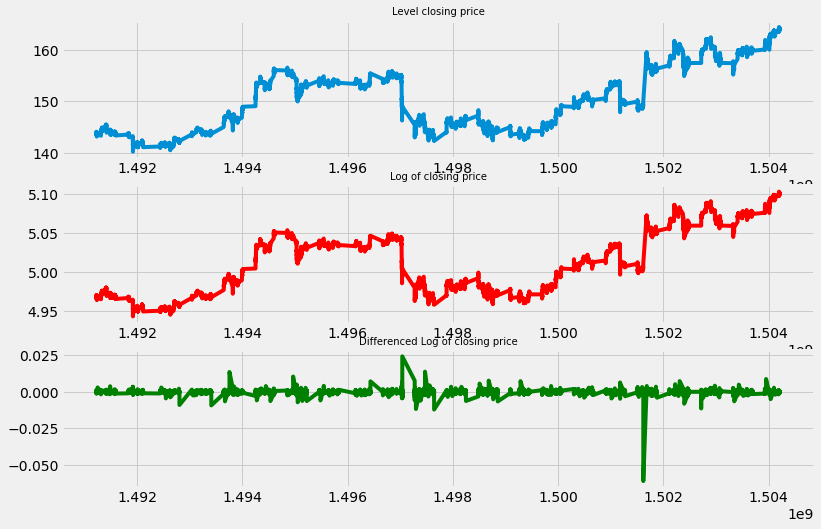

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot (data.DATE,data.AAPLE,label="AAPL Price")
plt.title("Level closing price", size=10)
#plt.ylable("Price in dollars",size=10)

plt.subplot(3,1,2)
plt.plot (data.DATE,data.logAAPL,label="Log of AAPL", color='r')
plt.title("Log of closing price", size=10)
#plt.ylable("Price in Log Dollars",size=10)

plt.subplot(3,1,3)
plt.plot (data.DATE,data.diflogAAPL,label="1st difference  of Log of AAPL", color='g')
plt.title("Differenced Log of closing price", size=10)
#plt.ylable("Differenced Closing Price",size=10)
#plt.xlabel('Day',size=10)

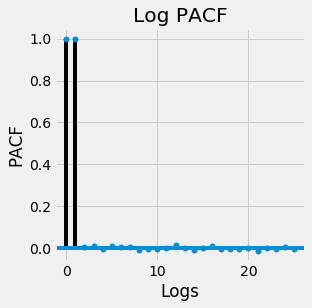

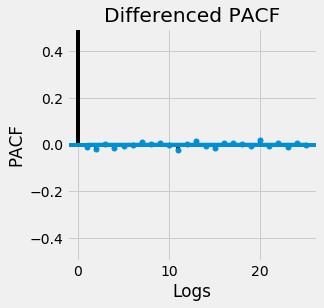

In [19]:
fig, ax = plt.subplots(figsize=(4,4))

#PACF displays and plots the sample partial autocorrelation function of one or more time series
plot_pacf(data.logAAPL, lags = 25, ax = ax)
ax.set_title('Log PACF')    
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.diflogAAPL, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


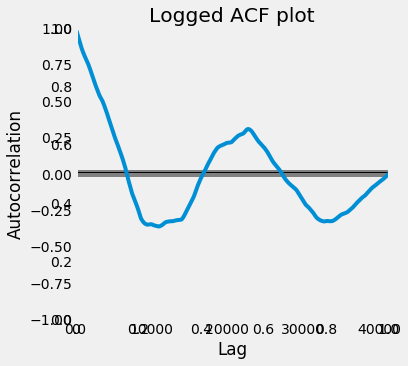

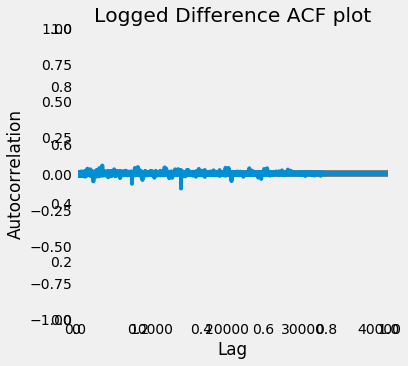

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.logAAPL)
ax.set_title("Logged ACF plot")

fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.diflogAAPL)
ax.set_title("Logged Difference ACF plot")

In [21]:
#perform Dickey-Fuller test

print("Result of Dickey-Fuller Test:")
dftest = adfuller(data.diflogAAPL, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Static','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Static                      -35.704395
p-value                            0.000000
#Lag Used                         30.000000
Number of Observations Used    41233.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


Because the test statistic is less than the 5% critical value and the p-value is lower than 0.05, the moving average is constant over time and the null hypothesis of the Dickey-Fuller test can be rejected. This shows that the weekly time series is stationary.

As it is stationary, before we apply ARIMA models for forecasting, we need not to transform this time series into a stationary time series.


In [22]:
ararray = (data.logAAPL.dropna().as_matrix())

p = 0
q = 0
d = 1
pdq = []
aic = []

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys,values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

(0, 1, 0) -492689.628814
(0, 1, 1) -492691.2955018546
(0, 1, 2) -492702.40871225984
(1, 1, 0) -492691.1705248717


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) -492691.69245713274
(1, 1, 2) -492703.1002256031
(2, 1, 0) -492702.14446474204
(2, 1, 1) -492702.5477501856
Best Model is : (1, 1, 2)


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):
The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. In our case, d=1, as we are modeling using the first order differenced time series.
There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

In [23]:
ARIMIAmod

In [24]:
ARIMIAmod.predict(typ='levels').shape

(41263,)

In [25]:
data.shape

(41264, 4)

In [26]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DATE,AAPLE,logAAPL,diflogAAPL,predict
0,1491226200,143.6800,4.967589,-0.000139,NaN
1,1491226260,143.7000,4.967728,0.000069,4.967592
2,1491226320,143.6901,4.967659,0.000349,4.967730
3,1491226380,143.6400,4.967310,-0.000139,4.967660
4,1491226440,143.6600,4.967449,-0.000835,4.967319


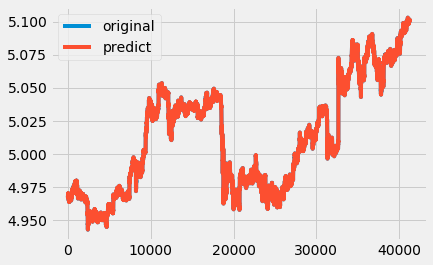

In [27]:
plt.plot(data['logAAPL'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [28]:
np.mean(np.abs(np.array((data['logAAPL'][1:] - data['predict'][1:]))))

0.00032045585785061089

In [29]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[ 5.09872455,  5.1011463 ],
       [ 5.09824669,  5.10165561],
       [ 5.09787878,  5.10202251],
       [ 5.09756847,  5.10234142],
       [ 5.09729449,  5.10262117],
       [ 5.09704688,  5.10287538],
       [ 5.09681917,  5.10310945],
       [ 5.0966073 ,  5.10332774],
       [ 5.09640839,  5.10353306],
       [ 5.09622035,  5.10372751]])

In [30]:
stepahead

array([ 5.09993542,  5.09995115,  5.09995064,  5.09995495,  5.09995783,
        5.09996113,  5.09996431,  5.09996752,  5.09997072,  5.09997393])

In [31]:
data['error'] = (data['logAAPL'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [32]:
data.head()

,DATE,AAPLE,logAAPL,diflogAAPL,predict,error,sqrError,absError
0,1491226200,143.6800,4.967589,-0.000139,NaN,NaN,NaN,NaN
1,1491226260,143.7000,4.967728,0.000069,4.967592,0.000136,1.849138e-08,0.000136
2,1491226320,143.6901,4.967659,0.000349,4.967730,-0.000071,5.018361e-09,0.000071
3,1491226380,143.6400,4.967310,-0.000139,4.967660,-0.000350,1.226175e-07,0.000350
4,1491226440,143.6600,4.967449,-0.000835,4.967319,0.000131,1.709840e-08,0.000131


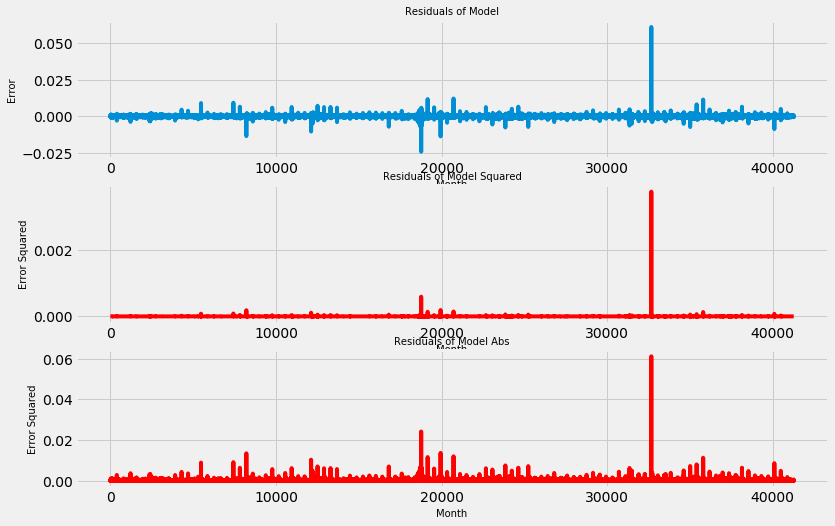

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


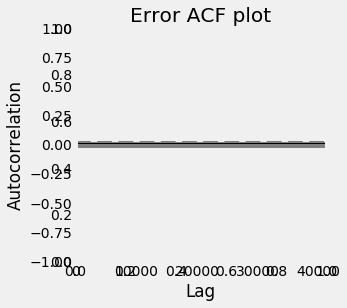

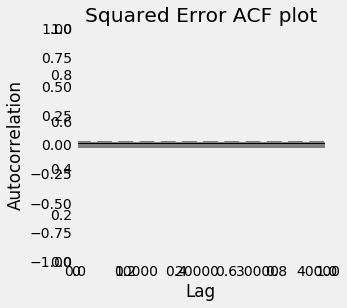

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.error)
ax.set_title('Error ACF plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.sqrError)
ax.set_title('Squared Error ACF plot')

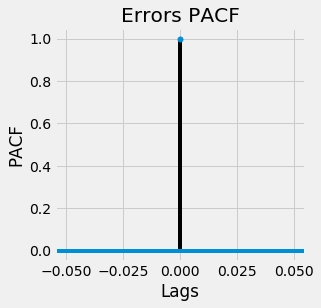

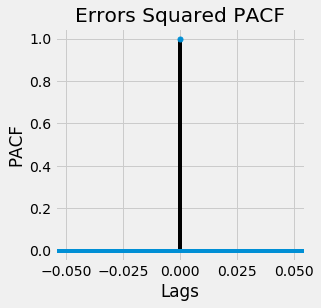

In [35]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [36]:
test = df[['DATE','AAPLE','logAAPL','diflogAAPL']][-100:]

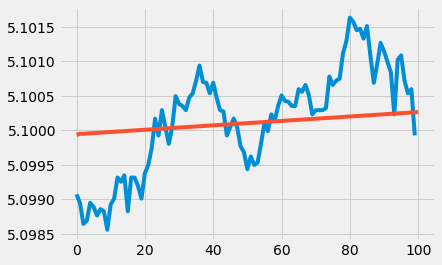

In [37]:
plt.plot(test.reset_index().logAAPL)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

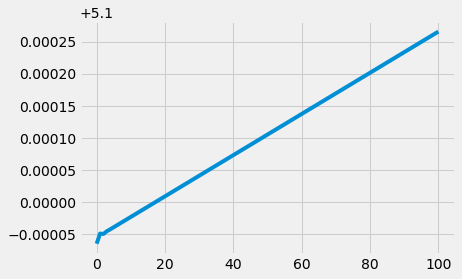

In [38]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

In [39]:
test = test.reset_index()

In [40]:
ARIMIAmod.forecast(1)[0]

array([ 5.09993542])

In [41]:
ararray = list(data.logAAPL.values)
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [42]:
test_logAAPL = list(test.logAAPL.values)

In [43]:
ararray = list(data.logAAPL.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logAAPL[i])

0
1
2
3
4


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


23


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


24


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


25


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


26


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


27
28
29


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


47
48
49


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


50


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


51
52
53
54
55
56
57


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


58
59
60
61
62
63
64


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


65
66
67
68
69
70
71


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


72


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


91
92


C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


93
94
95
96
97
98


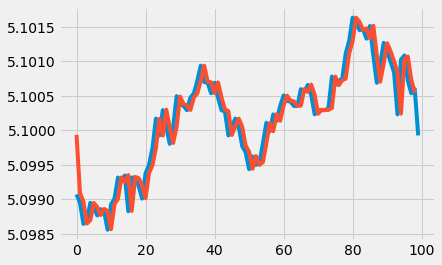

In [47]:
plt.plot(test_logAAPL)
plt.plot(np.array(test_predict).ravel())

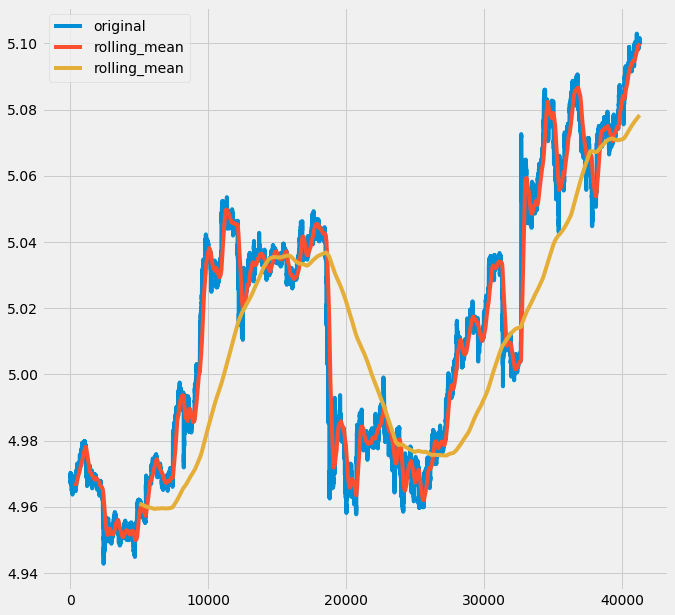

In [48]:
plt.figure(figsize=(10,10))
plt.plot(data.logAAPL, label='original')
plt.plot(data.logAAPL.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logAAPL.rolling(5000).mean(), label='rolling_mean')
plt.legend()

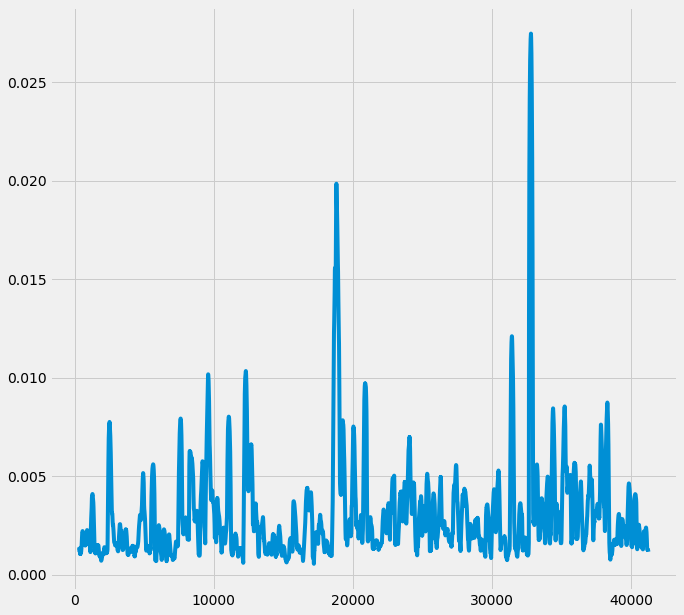

In [49]:
plt.figure(figsize=(10,10))
plt.plot(data.logAAPL.rolling(300).std())

Measure the variance between the data and the values predicted by the model

We can measure whether the results of your model fit the underlying data by using the residual sum of squares (RSS) metric. A small RSS indicates that the model fits tightly to the data.

Yet another approach to validate the ARIMA model appropriateness is by performing residual analysis.

Print the results of the ARIMA model and plot the residuals. A density plot of the residual error values indicates a normal distribution centered around zero mean. Also, the residuals do not violate the assumptions of constant location and scale with most values in the range (-1,1).

C:\Users\pc\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\pc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\pc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\pc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41361
Model:                 ARIMA(1, 1, 2)   Log Likelihood              246982.487
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 14 Nov 2018   AIC                        -493954.974
Time:                        17:53:16   BIC                        -493911.823
Sample:                             1   HQIC                       -493941.337
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.212e-06   2.96e-06      1.084      0.279    -2.6e-06    9.02e-06
ar.L1.D.y     -0.2965        nan        nan        nan         nan         nan
ma.L1.D.y      0.2872        nan        nan        n

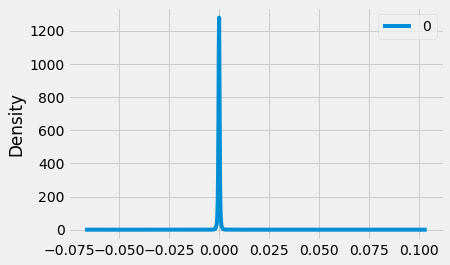

In [50]:
from pandas import DataFrame

print(ARIMIAmod.summary())
# plot residual errors
residuals = DataFrame(ARIMIAmod.resid)
residuals.plot(kind='kde')
print(residuals.describe())

The model validation checks we ran have confirmed good results.
We have performed forecasting for stocks of Apple Inc. using ARIMA as we trained the model on the entire time series data.